Datos sin limpieza:
   Edad Genero  Colesterol  Presion_Arterial Hipertension
0    69      M         235               112           Sí
1    32      F         294               179           No
2    89      M         291               146           Sí
3    78      M         158               148           No
4    38      M         243                91           No

Resumen estadístico:
              Edad   Colesterol  Presion_Arterial
count  5000.000000  5000.000000        5000.00000
mean     53.299000   223.149400         138.80940
std      20.646851    42.928266          34.79742
min      18.000000   150.000000          80.00000
25%      36.000000   186.000000         108.00000
50%      53.000000   223.000000         138.00000
75%      71.000000   260.000000         169.00000
max      89.000000   299.000000         199.00000

Valores nulos por columna:
Edad                0
Genero              0
Colesterol          0
Presion_Arterial    0
Hipertension        0
dtype: int64

Datos li

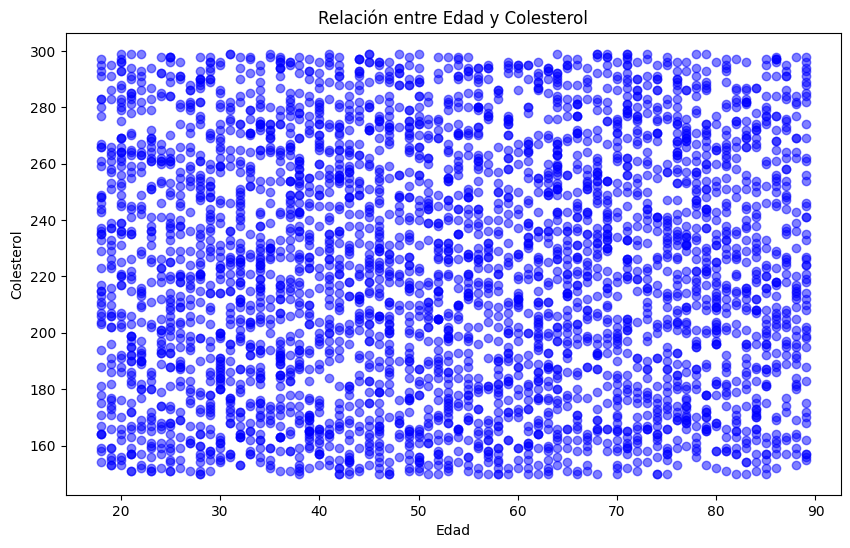

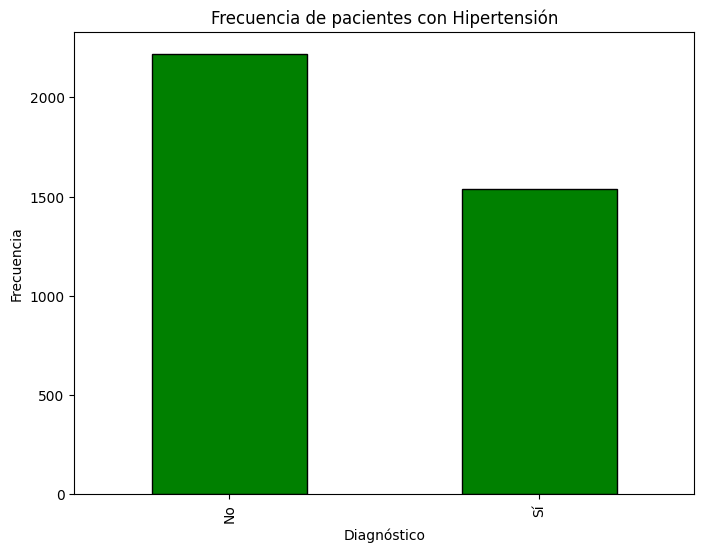

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data ficticia de 5000 registros
np.random.seed(42)
data_size = 5000
data = {
    'Edad': np.random.randint(18, 90, size=data_size),
    'Genero': np.random.choice(['M', 'F'], size=data_size),
    'Colesterol': np.random.randint(150, 300, size=data_size),
    'Presion_Arterial': np.random.randint(80, 200, size=data_size),
    'Hipertension': np.random.choice(['Sí', 'No'], size=data_size, p=[0.4, 0.6])
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Guardar el DataFrame en un archivo CSV para su descarga antes de la limpieza
file_path_clean = 'datos salud..csv'
df.to_csv(file_path_clean, index=False)

# Mostrar las primeras filas
print("Datos sin limpieza:")
print(df.head())

# Exploración de datos
print("\nResumen estadístico:")
print(df.describe())

print("\nValores nulos por columna:")
print(df.isnull().sum())

# Limpieza de datos
# Supongamos que queremos eliminar los valores donde la presión arterial esté fuera del rango lógico (por ejemplo, mayor a 180 o menor a 90)
df_cleaned = df[(df['Presion_Arterial'] >= 90) & (df['Presion_Arterial'] <= 180)]

# Verificación después de limpieza
print("\nDatos limpios:")
print(df_cleaned.describe())

# Guardar los datos limpios en un archivo CSV
file_path_cleaned = 'datos_salud_limpios.csv'
df_cleaned.to_csv(file_path_cleaned, index=False)

# Visualización: Relación entre Edad y Colesterol
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Edad'], df_cleaned['Colesterol'], c='blue', alpha=0.5)
plt.title('Relación entre Edad y Colesterol')
plt.xlabel('Edad')
plt.ylabel('Colesterol')
plt.show()

# Visualización: Frecuencia de pacientes con Hipertensión
plt.figure(figsize=(8, 6))
df_cleaned['Hipertension'].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.title('Frecuencia de pacientes con Hipertensión')
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.show()